### Correlation plots
This experiment plots the correlation coefficient matrix for the mean vectors of a subset of reviews from any game from the dataset. The title of the game, as well as the fraction or number of reviews to sample from the dataset can be specified in the last cell.

Michael Pasch, January 2024

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

import spacy
nlp = spacy.load('en_core_web_lg')

from matplotlib import pyplot as plt

from utils import generate_sample_df, get_fallout_4_df, preprocess_df

[nltk_data] Downloading package wordnet to /home/isi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/isi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def visualize_review_corrcoef(df, title='corrCoefPlot'):
    # embedd the reviews, build corrcoef matrix and visualize it
    df_copy = df.copy(deep=True) # copy or original dataset will be embedded
    df_copy['review'] = df_copy['review'].apply(lambda x: nlp(x).vector)
    np_data = df_copy['review'].to_numpy()
    #edge_negative_reviews = len(df_copy[df_copy['rating'] == 'Not Recommended'])
    edge_negative_reviews = len(df_copy[df_copy['rating'] == 0])
    stacked_data = np_data[0]
    for row in range(np_data.shape[0]):
        stacked_data = np.vstack((stacked_data,np_data[row]))
    corrcoef_matrix = np.corrcoef(stacked_data)
    corrcoef_matrix = np.nan_to_num(corrcoef_matrix)
    # insert white line to separate negative and positive reviews
    for i in range(20):
        corrcoef_matrix = np.insert(corrcoef_matrix, edge_negative_reviews+i, 1, axis=0)
        corrcoef_matrix = np.insert(corrcoef_matrix, edge_negative_reviews, 1, axis=1)
    # set plotsize so that each pixel is one entry in matrix
    plt.figure(figsize=(corrcoef_matrix.shape[0]/100,corrcoef_matrix.shape[1]/100))
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    ax = plt.imshow(corrcoef_matrix, cmap=plt.cm.ocean)
    plt.colorbar()
    plt.savefig(f"out/{title}_matrix.pdf")

    plt.show()

Fallout_4: choosing 1836 out of 6120 reviews. Positive ratio: 0.3411764705882353



/home/isi/miniconda3/envs/vhenv/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/isi/miniconda3/envs/vhenv/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


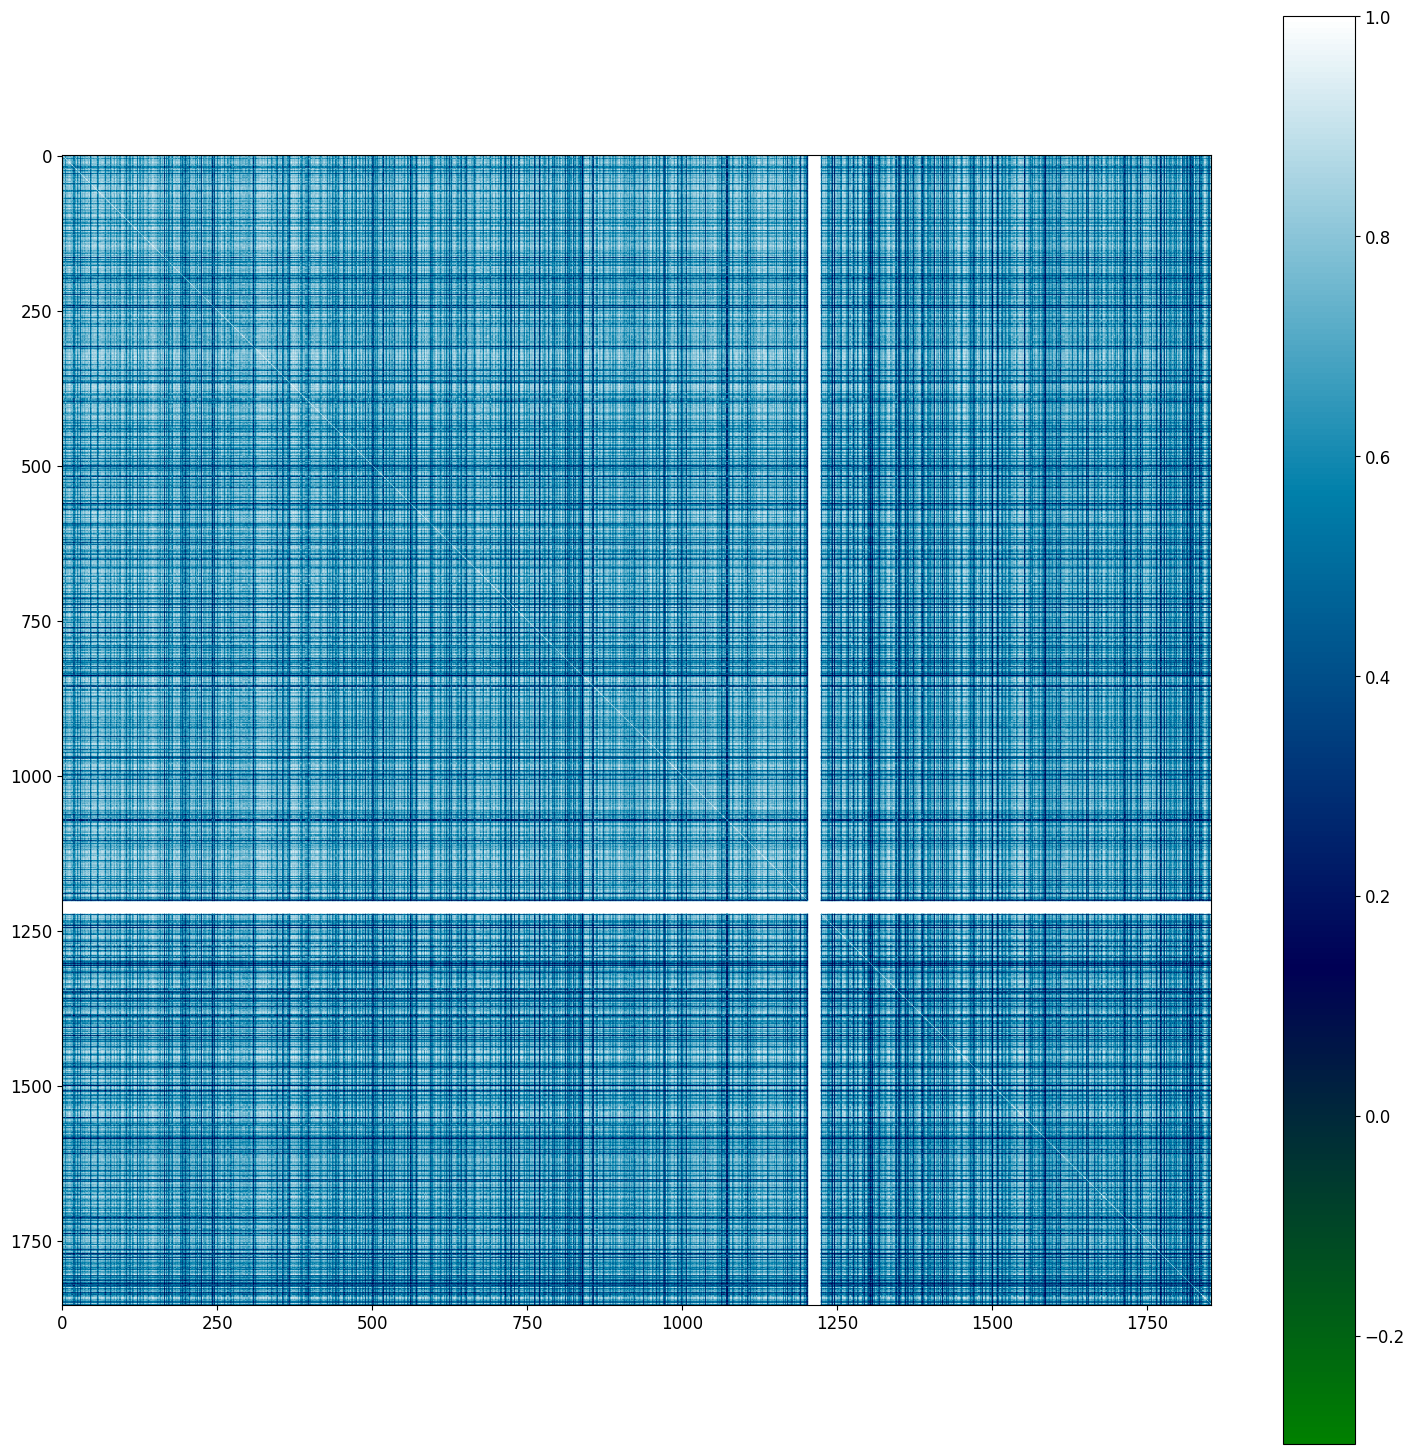

In [3]:
game = "Fallout_4"
# fraction of reviews to sample from the complete dataframe
# to sample an absolute number, give 'number=xx' to the function "generate_sample_df" instead of 'fraction'
fraction = 0.3

if game == 'Fallout_4':
    df_sample, choice, n, pos, neg = get_fallout_4_df(fraction=fraction, path='../../dat/additional_games')
else:
    df_sample, choice, n, pos, neg = generate_sample_df(game=game, fraction=fraction, path='../../dat/')  
print('{}: choosing {} out of {} reviews. Positive ratio: {}\n'.format(game, choice, n, pos/n))

data = preprocess_df(df_sample)
visualize_review_corrcoef(data, title=game)